In [1]:
import numpy as np
import pandas as pd
import random
import shap
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

In [2]:
#individuals
n = 2000
#loci
m = 100


#here every matrix entree has to be zero or one, with having a f_i probability to get selected
#frequency of alleles, random uniform distribution between 0 and 1, with m samples
f_M = np.random.uniform(0,1,m)

#initialize G matrix
# G = np.zeros((n, m));

# #will be used to flip a coin based on f_i
# #higher f_i frequency = higher chance of returning true
# def loci_frequency_flip(f_i):
#     return random.random() < f_i

# #use this if I wanted to populate entire G matrix
# #k are the colums(loci)
# for k in range (0, len(G[0])):
#     # j are the rows(individuals)
#     for j in range (0, len(G)):
#         #frequency of loci k we are currently on
#         if(loci_frequency_flip(f_M[k])):
#             G[j,k] = 1
#creates a G matrix where each loci has a chance to be 0 or 1 based on their 
#frequency from the uniform distribution f_m
G = np.random.binomial(n=2,p = f_M, size =  (n,m))

# If 0, independently standardize each feature, otherwise (if 1) standardize each sample, so choosing 0 
# to do column wise scaling
G = preprocessing.scale(G, axis=0)
# choose random SNP
loci =random.randint(0,m-1)

#select SNP
SNP = G[:,loci]

#preview of the data
print(SNP[0:30])

[-0.92202601 -0.92202601 -0.92202601 -0.92202601 -0.92202601  0.64338317
  0.64338317 -0.92202601  2.20879236  0.64338317 -0.92202601 -0.92202601
 -0.92202601  0.64338317  0.64338317  0.64338317 -0.92202601  0.64338317
 -0.92202601 -0.92202601 -0.92202601  2.20879236  0.64338317 -0.92202601
  0.64338317 -0.92202601  0.64338317  0.64338317 -0.92202601  0.64338317]


In [3]:

# mean and standard deviation
H=0
#assumes that we are making a Y_j for every individual in the SNP and 
#in each loop we choose a e_j for that person
def Simulate_Phenotype_PerPerson(SNP,var_e,var_g):
    
    #rows are the loci so each person has a row of different loci
    individuals = len(SNP)
    
    #where columns are the individuals
    mean = 0 
    
    #because we are given variance and python random.normal only accepts std, we need to convert variance to std
    sigma_e = sqrt(var_e)
    sigma_b = sqrt(var_g)
    
    #b_i = loci effect on phenotype
    b_i = np.random.normal(0, sigma_b)
    Y_n = np.zeros((individuals, 1))
    
    for k in range(0, individuals):
        #each individual will have a random e_j(noise) value
        e_j = np.random.normal(0, sigma_e)
        #G_ij will be the jth individual from our SNP for the loci of choce
        G_ij  = SNP[k]
        Y_j = b_i*G_ij + e_j
        Y_n[k] = Y_j 
    H= var_g/(var_g+var_e)
    return Y_n,H


In [4]:
Y,H = Simulate_Phenotype_PerPerson(SNP,.3,.7)

In [5]:
# function assumes that for each person j in M we make a phenotype Y_j
print('Phenotypes for loci '+str(loci)+' are '+str(Y[0:30]))

Phenotypes for loci 3 are [[-0.86032435]
 [-0.54086977]
 [-0.58960318]
 [-0.42013733]
 [ 0.32700938]
 [-0.25635589]
 [ 0.97154869]
 [-0.71666074]
 [ 2.33866145]
 [ 0.3070968 ]
 [-0.94126196]
 [-1.06664432]
 [-1.22860579]
 [ 0.42512279]
 [ 0.7325225 ]
 [ 0.610215  ]
 [-1.05039311]
 [ 0.63223684]
 [-2.12280939]
 [-0.77091958]
 [-1.44374081]
 [ 1.52352013]
 [ 0.29673939]
 [-1.19537882]
 [ 0.78763706]
 [-0.61548641]
 [ 0.49168473]
 [ 0.11607018]
 [-0.6088927 ]
 [ 1.20550203]]


In [6]:
G = np.append(G, Y, axis=1)

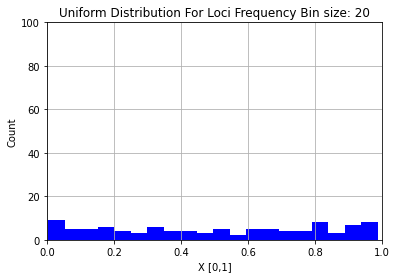

In [7]:
#use this to see distribution of f_i frequency
bin_size = 20
count, bins, ignored = plt.hist(f_M, 20, facecolor='blue') 

plt.xlabel('X [0,1]')
plt.ylabel('Count')
plt.title("Uniform Distribution For Loci Frequency Bin size: "+str(bin_size))
plt.axis([0, 1, 0, 100]) # x_start, x_end, y_start, y_end
plt.grid(True)

plt.show(block = False)

In [8]:
#split data into test and train
X = G[:,0:len(G[0])-2]

#last column is the appended Y vector we predicted
y = G[:,len(G[0])-1]

#split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [9]:
linReg = LinearRegression()  

In [11]:
#training the algorithm
linReg.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
import warnings
warnings.filterwarnings("ignore")
explainer = shap.KernelExplainer(linReg.predict, x_train)
shap_values = explainer.shap_values(x_train)

Using 1400 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

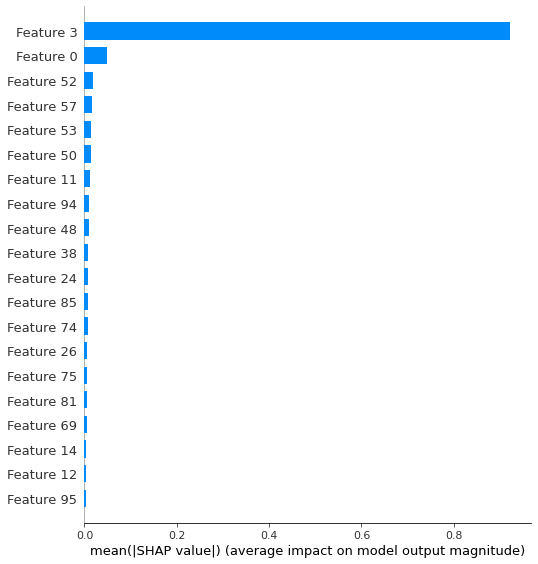

In [15]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

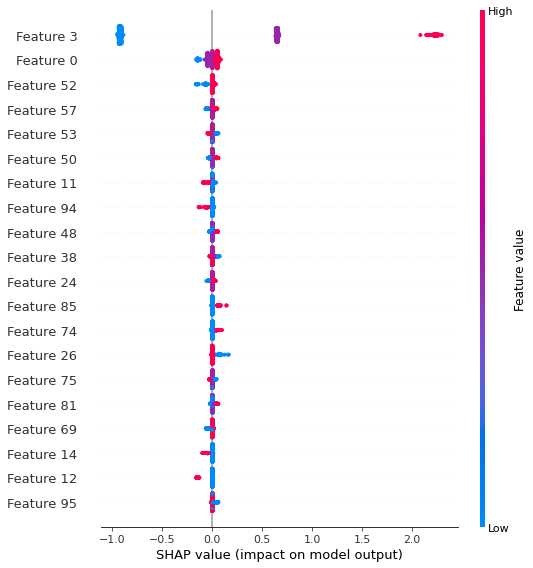

In [14]:
shap.summary_plot(shap_values,x_train)

In [ ]:
#regression model of SVM with RBF kernal
#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

In [16]:
# train the model
#svr_rbf.fit(x_train, y_train)

#test the model on test data
y_predict = linReg.predict(x_test)

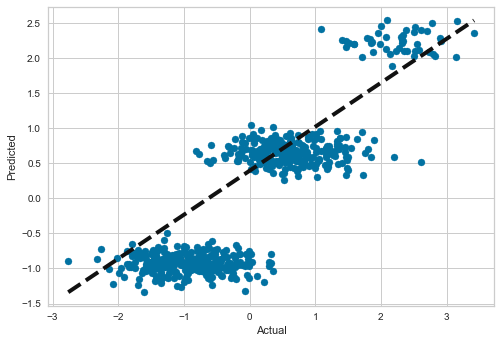

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_predict.min(), y_predict.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

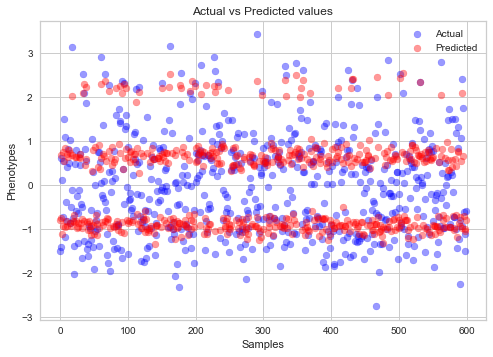

In [60]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.4)
ax.scatter(x = range(0, y_predict.size), y=y_predict, c = 'red', label = 'Predicted', alpha = 0.4)

plt.title('Actual vs Predicted values')
plt.xlabel('Samples')
plt.ylabel('Phenotypes')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

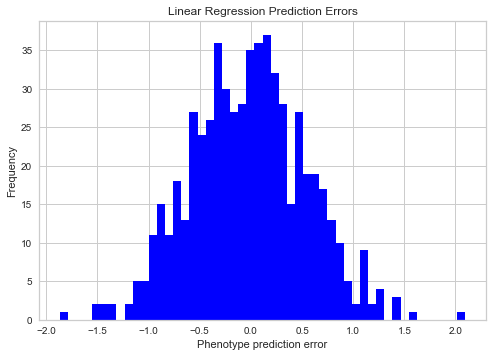

In [66]:
diff = y_test - y_predict
plt.hist(diff,bins = 50, color = 'blue')
plt.title('Linear Regression Prediction Errors')
plt.xlabel('Phenotype prediction error')
plt.ylabel('Frequency')

In [17]:
#Evaluate the regression model
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predict), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predict), 2)) 
rmse = sm.mean_squared_error(y_test, y_predict)
print("Root Mean squared error =", round(sqrt(rmse),2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predict), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_predict), 2))

Mean absolute error = 0.45
Mean squared error = 0.32
Root Mean squared error = 0.56
Median absolute error = 0.38
Explain variance score = 0.76
R2 score = 0.76


In [18]:
from sklearn.ensemble import RandomForestRegressor
#initialize tree with a node depth of 10 and 50 decision trees
forReg = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=50)
forReg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


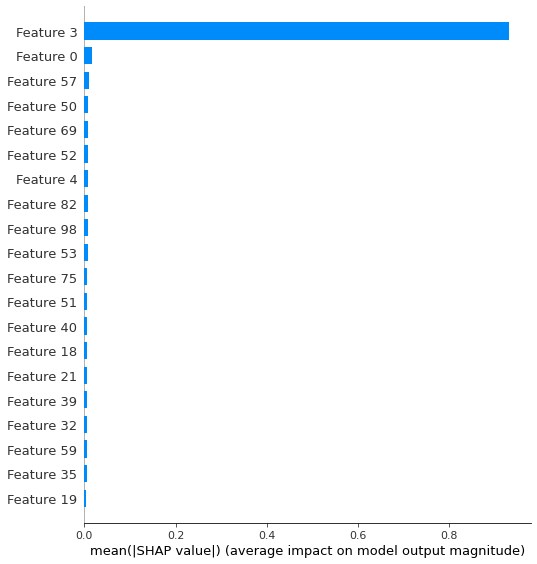

In [19]:
shap_values = shap.TreeExplainer(forReg).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

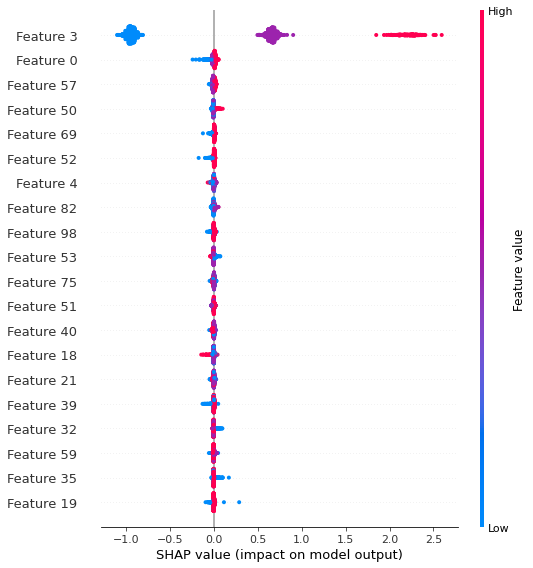

In [20]:
shap.summary_plot(shap_values,x_train)

In [21]:
y_predict2 = forReg.predict(x_test)

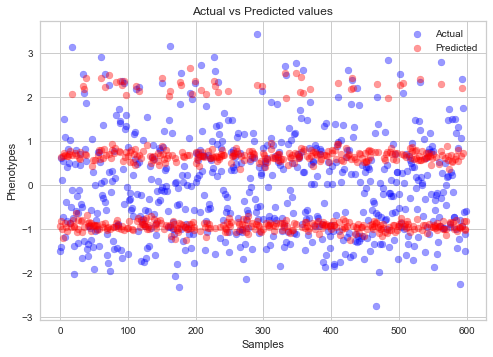

In [62]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.4)
ax.scatter(x = range(0, y_predict2.size), y=y_predict2, c = 'red', label = 'Predicted', alpha = 0.4)

plt.title('Actual vs Predicted values')
plt.xlabel('Samples')
plt.ylabel('Phenotypes')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

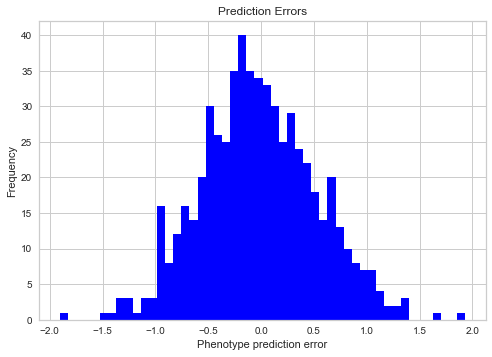

In [63]:
diff = y_test - y_predict2
plt.hist(diff,bins = 50, color = 'blue')
plt.title('Prediction Errors')
plt.xlabel('Phenotype prediction error')
plt.ylabel('Frequency')

In [22]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predict2), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predict2), 2)) 
rmse = sm.mean_squared_error(y_test, y_predict2)
print("Root Mean squared error =", round(sqrt(rmse),2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predict2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predict2), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_predict2), 2))

Mean absolute error = 0.44
Mean squared error = 0.3
Root Mean squared error = 0.55
Median absolute error = 0.37
Explain variance score = 0.77
R2 score = 0.77


In [ ]:
def trait_simulation(samples_n, loci_m,var_g,var_e):
    f_M = np.random.uniform(0,1,loci_m)
    G = np.random.binomial(n=2,p = f_M, size = (samples_n,loci_m))
    G = preprocessing.scale(G, axis=0)
    loci =random.randint(0,loci_m-1)
    SNP = G[:,loci]
    individuals = len(SNP)
    mean = 0 
    sigma_b = sqrt(var_g)
    sigma_e = sqrt(var_e)
    b_i = np.random.normal(0, sigma_b)
    Y_n = np.zeros((individuals, 1))
    for k in range(0, individuals):
        #each individual will have a random e_j(noise) value
        e_j = np.random.normal(0, sigma_e)
        #G_ij will be the jth individual from our SNP for the loci of choce
        G_ij  = SNP[k]
        Y_j = b_i*G_ij + e_j
        Y_n[k] = Y_j 
    H= var_g/(var_g+var_e)
    G = np.append(G, Y_n, axis=1)
    X = G[:,0:len(G[0])-2]
    y = G[:,len(G[0])-1]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    linReg = LinearRegression()  
    linReg.fit(x_train, y_train) 
    explainer = shap.KernelExplainer(linReg.predict, shap.sample(x_train, 100))
    shap_values = explainer.shap_values(x_train)
    return shap_values,var_g,var_e
    
    

In [ ]:
shap_V,v_g,v_e = trait_simulation(30,20,.4,.5)